# Climate Data

In [46]:
import pandas as pd

In [47]:
weekly_max_temp = pd.read_csv("weekly_max_temp_forecast.csv")
weekly_max_temp['week'] = pd.to_datetime(weekly_max_temp['week'])
weekly_max_temp_forecast = weekly_max_temp[weekly_max_temp['week'] > "2025-12-28"]
weekly_max_temp_forecast["week"] = weekly_max_temp_forecast["week"] + pd.Timedelta(days=1)
weekly_max_temp_forecast

/var/folders/83/z6dh6x592f7cw62tg8hz97000000gp/T/ipykernel_3183/2013423209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_max_temp_forecast["week"] = weekly_max_temp_forecast["week"] + pd.Timedelta(days=1)


,week,max_temp_forecast,ci_lower,ci_upper
21,2026-01-05,19.495294,14.247256,24.743332
22,2026-01-12,20.643402,15.389979,25.896826
23,2026-01-19,19.180595,13.921805,24.439385
24,2026-01-26,19.605667,14.341519,24.869815
25,2026-02-02,18.647528,13.378028,23.917027
26,2026-02-09,18.334231,13.059386,23.609076
27,2026-02-16,17.960930,12.680744,23.241115
28,2026-02-23,18.120217,12.834697,23.405737
29,2026-03-02,17.833917,12.543068,23.124766
30,2026-03-09,16.105111,10.808937,21.401284


In [48]:
score_df = pd.DataFrame()
score_df["week"] = weekly_max_temp_forecast["week"]
score_df["temp_score"] = 1 - weekly_max_temp_forecast["max_temp_forecast"].rank(pct=True)
score_df

,week,temp_score
21,2026-01-05,0.051282
22,2026-01-12,0.000000
23,2026-01-19,0.076923
24,2026-01-26,0.025641
25,2026-02-02,0.102564
26,2026-02-09,0.128205
27,2026-02-16,0.179487
28,2026-02-23,0.153846
29,2026-03-02,0.205128
30,2026-03-09,0.230769


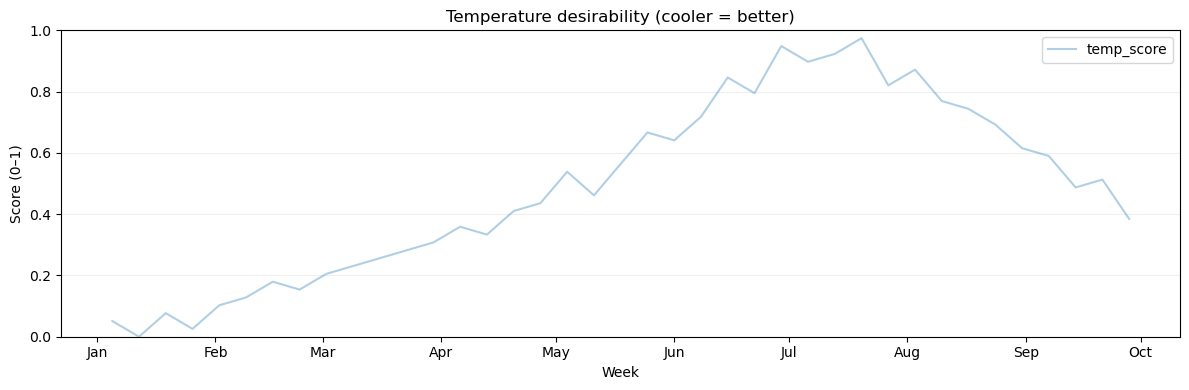

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# ensure sorted + datetime
score_df = score_df.copy()
score_df["week"] = pd.to_datetime(score_df["week"], errors="coerce")
score_df = score_df.sort_values("week")

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(score_df["week"], score_df["temp_score"], alpha=0.35, label="temp_score")


ax.set_title("Temperature desirability (cooler = better)")
ax.set_ylabel("Score (0–1)")
ax.set_xlabel("Week")
ax.set_ylim(0, 1)

# Month labels only (no year under Jan)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.grid(axis="y", alpha=0.2)
ax.legend()
plt.tight_layout()
plt.show()


# Price Data

In [50]:
average_price_weekly = pd.read_csv("weekly_avg_price.csv")
average_price_weekly

,week,avg_price
0,2025-12-29,1906.963855
1,2026-01-05,1832.696970
2,2026-01-12,1758.010000
3,2026-01-19,1661.233010
4,2026-01-26,1457.291262
5,2026-02-02,1563.852941
6,2026-02-09,1531.833333
7,2026-02-16,1486.475248
8,2026-02-23,1478.078431
9,2026-03-02,1533.549020


In [51]:
score_df["price_score"] = average_price_weekly["avg_price"].rank(pct=True)
score_df 

,week,temp_score,price_score
21,2026-01-05,0.051282,0.150943
22,2026-01-12,0.000000,0.396226
23,2026-01-19,0.076923,0.358491
24,2026-01-26,0.025641,0.433962
25,2026-02-02,0.102564,0.754717
26,2026-02-09,0.128205,1.000000
27,2026-02-16,0.179487,0.962264
28,2026-02-23,0.153846,0.943396
29,2026-03-02,0.205128,0.981132
30,2026-03-09,0.230769,0.905660


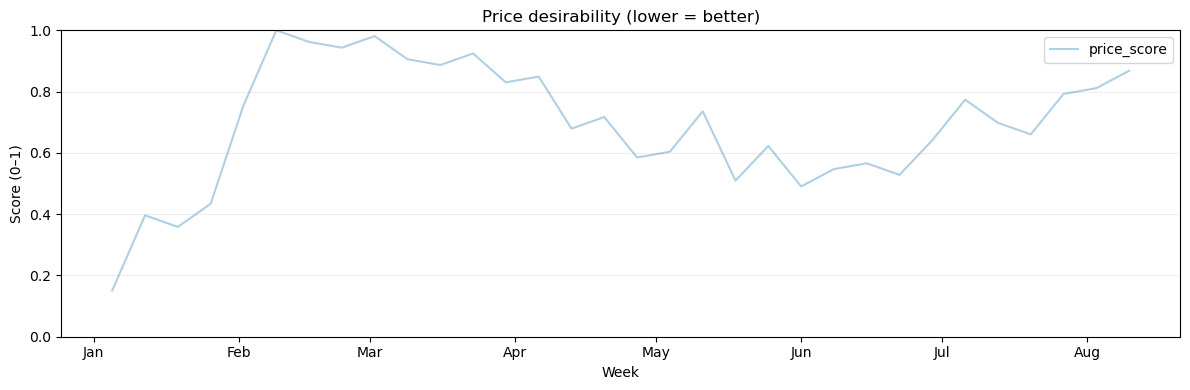

In [54]:
# ensure sorted + datetime
score_df = score_df.copy()
score_df["week"] = pd.to_datetime(score_df["week"], errors="coerce")
score_df = score_df.sort_values("week")

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(score_df["week"], score_df["price_score"], alpha=0.35, label="price_score")


ax.set_title("Price desirability (lower = better)")
ax.set_ylabel("Score (0–1)")
ax.set_xlabel("Week")
ax.set_ylim(0, 1)

# Month labels only (no year under Jan)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.grid(axis="y", alpha=0.2)
ax.legend()
plt.tight_layout()
plt.show()


# Overall Score

In [ ]:
w_temp, w_price = 0.6, 0.4   # tweak to taste
score_df["overall_score"] = (
    w_temp  * score_df["temp_score"] +
    w_price * score_df["price_score"]
)


Best week start date: 2026-07-20 (score=0.849)


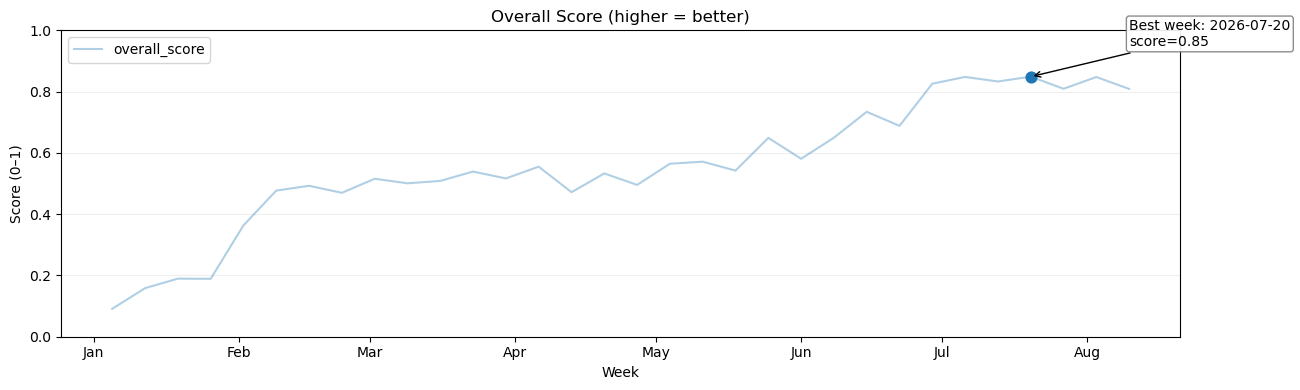

In [57]:
# ensure sorted + datetime
score_df = score_df.copy()
score_df["week"] = pd.to_datetime(score_df["week"], errors="coerce")
score_df = score_df.sort_values("week")

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(score_df["week"], score_df["overall_score"], alpha=0.35, label="overall_score")


ax.set_title("Overall Score (higher = better)")
ax.set_ylabel("Score (0–1)")
ax.set_xlabel("Week")
ax.set_ylim(0, 1)

# Month labels only (no year under Jan)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.grid(axis="y", alpha=0.2)
ax.legend()
plt.tight_layout()


# find best week (start date) by overall_score
valid = score_df.dropna(subset=["overall_score", "week"])
best_idx = valid["overall_score"].idxmax()
best_week = pd.to_datetime(valid.loc[best_idx, "week"])
best_score = float(valid.loc[best_idx, "overall_score"])

# mark + annotate on the chart
ax.scatter([best_week], [best_score], s=60, zorder=3)
ax.annotate(
    f"Best week: {best_week:%Y-%m-%d}\nscore={best_score:.2f}",
    xy=(best_week, best_score),
    xytext=(best_week + pd.Timedelta(days=21), min(0.95, best_score + 0.1)),
    arrowprops=dict(arrowstyle="->", lw=1),
    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.9)
)

print(f"Best week start date: {best_week:%Y-%m-%d} (score={best_score:.3f})")

plt.show()
